# `pathfinder`

The `pathfinder` algorithm uses a steepest ascent algorithm to group pixels.  For any given pixel, the algorithm checks the surrounding pixels for the maximum value; the current pixel and the pixel with the maximum value are grouped.  Then this is then repeated for the pixel with the maximum value.  It stops when the current pixel is the local maximum in the neighborhood.


In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Sun Jan 20 15:00:30 EST 2019


In [2]:
# Routine to display images using ds9 in notebook
display_map()
{
img=$1
map=$2
png=$3
reg=$4

if test x${reg} == x
then
  region=""
else
  region="-region $reg"
fi

ds9 -geom 1550x824 -scale asinh -scale limits 0 200 \
  -zoom 2 -cmap load sunset-in-atlantis.sao  \
  -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
  $img \
  -frame new -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
  $map -scale linear -scale mode minmax \
  $region -regions select all -regions color black -regions select none \
  -tile yes \
  -saveimage png $png -exit 

display < $png
}

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

### Example

In [4]:
pathfinder img.psf_asm outfile=pathfinder.map minval=0.2 clob+

pathfinder
          infile = img.psf_asm
         outfile = pathfinder.map
          minval = 0.2
       direction = diagonal
        debugreg = 
         verbose = 1
         clobber = yes
            mode = ql



In [5]:
# Unlike the other tools, `pathfinder` doesn't create the binned image
dmmaskbin img.fits pathfinder.map pathfinder.img clob+

In [6]:
map2reg pathfinder.map pathfinder.reg

map2reg
          infile = pathfinder.map
         outfile = pathfinder.reg
         verbose = 1
         clobber = no
            mode = ql

304
1
607
909
2
305
608
910
609
306
3
911
912
610
307
4
611
913
308
5
612
914
309
6
613
915
310
7
614
311
916
8
615
312
917
9
616
918
313
10
617
919
314
11
618
920
315
12
619
921
316
13
620
922
317
14
621
923
318
15
622
319
924
16
320
623
925
17
321
624
926
18
322
625
927
19
323
626
928
20
324
627
929
21
325
628
930
22
326
629
931
23
327
630
932
24
328
631
933
25
329
632
934
26
330
633
935
27
331
634
936
28
332
635
937
29
333
636
938
30
334
637
939
31
335
638
940
32
336
639
941
33
337
640
942
34
338
641
943
35
339
642
944
36
340
643
945
37
341
644
946
38
645
342
947
343
646
39
948
344
647
40
949
345
41
648
950
346
42
649
951
347
650
43
952
348
651
44
953
349
45
652
954
350
653
46
955
351
654
956
47
352
655
48
957
353
656
958
49
354
959
657
50
355
960
658
51
356
961
659
52
357
660
53
962
358
963
54
661
359
964
662
55
360
965
663
56
361
966
664
57


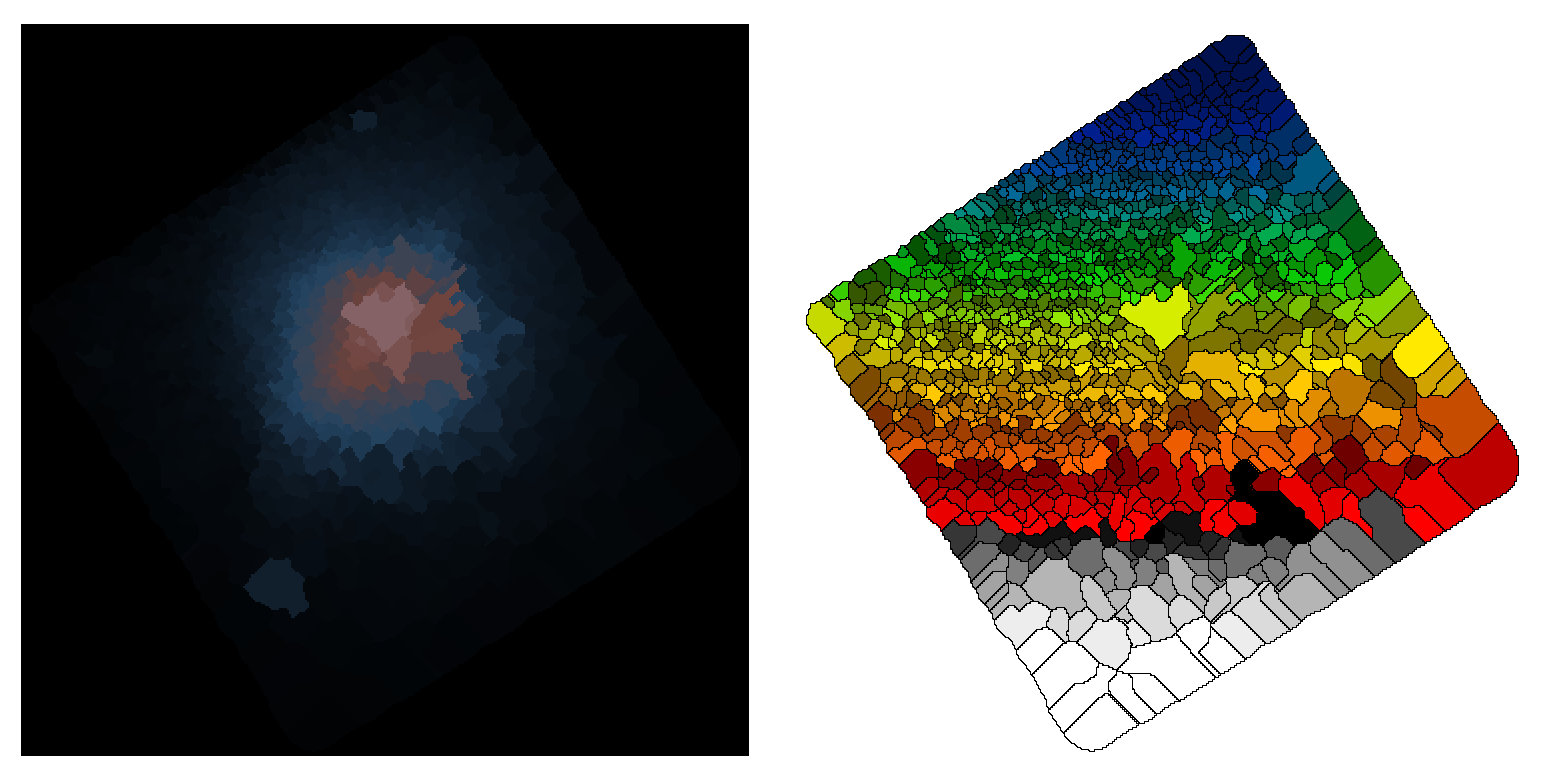

In [7]:
display_map pathfinder.img pathfinder.map pathfinder.png pathfinder.reg

This algorithm is similar to `grow_from_max`, except instead of relying on the distance from a pixel to the local-max, it relies on the gradient to the local maximum.  This allows say two point sources to separate at the saddle point between them rather than at a fixed distance.

Again, this works best when the input image has been smoothed such that the local max and gradients are meaningful.